# <FONT COLOR="red">***SINGLE AND MULTIPLE LINEAR REGRESSION***</FONT>
---
---

The main objective of this notebook is to create the **Linear Regression Model** and **Multiple Linear Regression Model**, which rely on a real dataset to practice the acquired acknowledgment.

## <FONT COLOR = "Orange">**Data Preparation**</FONT>
---
The first step is to import the necessary libraries in both models to avoid errors.

In [68]:
# IMPORT LIBRARIES TO DATA PREPROCESS IN BOTH MODELS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# IMPORT LIBRARIES TO CREATE FIGURES
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTT LIBRARIES TO OBTAIN THE METRICS
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

The second step is load the dataset, and also realize a minimun data preprocessing to ensure its quality and realibility.

In [41]:
# LOAD DATASET INTO A DATAFRAME
df_hPrice = pd.read_csv('California_House_Price.csv')

# DISPLAY DATAFRAME
display(df_hPrice)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [42]:
# PRESENT THE DATASET INFORMATION
display(df_hPrice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


None

In [43]:
# STATISTICAL DESCRIPTION OF THE DATAFRAME
display(df_hPrice.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [44]:
# DROP ROWS WITH NULL INFORMATION
df_hPrice = df_hPrice.dropna()

# DISPLAY INFORMATION DATASET
display(df_hPrice.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


None

In this case, how my dataset contain categorical information, I need realize a encode classification to the **ocean_proximity** feature.

In [45]:
# ENCODE CATEGORICAL FEATURE
df_hPrice['ocean_proximity'] = df_hPrice['ocean_proximity'].astype('category').cat.codes

# PRESENT THE ENCODE FEATURE
display(df_hPrice['ocean_proximity'].unique())

<ipython-input-45-92d586d09c5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hPrice['ocean_proximity'] = df_hPrice['ocean_proximity'].astype('category').cat.codes


array([3, 0, 1, 4, 2], dtype=int8)

The last step of the data preprocessing is the data normalization.

In [46]:
# DATA NORMALIZATION (MIN:-1, MAX:1)
scaler = MinMaxScaler(feature_range=(-1, 1))
df_hPrice = pd.DataFrame(scaler.fit_transform(df_hPrice), columns = df_hPrice.columns)

# STATISTICAL DESCRIPTION
display(df_hPrice.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-0.047946,-0.342567,0.083651,-0.865990,-0.833374,-0.920292,-0.836069,-0.535005,-0.416924,-0.208806
std,0.399119,0.454059,0.493796,0.111159,0.130784,0.063522,0.125736,0.261968,0.710067,0.476021
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.492032,-0.704570,-0.333333,-0.926344,-0.908442,-0.956053,-0.908239,-0.715342,-1.000000,-0.569070
50%,0.167331,-0.634431,0.098039,-0.891907,-0.865301,-0.934808,-0.865812,-0.581164,-0.500000,-0.320823
75%,0.262948,0.100956,0.411765,-0.840226,-0.799503,-0.903641,-0.801677,-0.414615,-0.500000,0.029691
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <FONT COLOR="orange">**Linear Regression Practice**</FONT>
---

To achieve a good level in the exercise, it is relevant to import the necessary libraries to implement a **Linear Regression Model**; in this case, I use [Linear Regression Model of Sklearn library](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html).

In [47]:
# IMPORT LIBRARIES
from sklearn.linear_model import LinearRegression

To achieve a good prediction with the **Linear Regression Model**, it is essential to select the correct feature to realize the prediction. The easiest way to determine which feature to select is using the correlation matrix to determine which feature has the highest relation with the target.

The most common is to utilize only the training data, but in practical terms, I will use all the datasets to identify the correct feature.

In [80]:
# CORRELATATION MATRIX FUNCTION
def corr_matrix(df:pd.DataFrame)->None:
    # CREATE FIGURE
    plt.figure(figsize = (10,10))

    # CORRELATION MATRIX
    cor = df.corr()

    # CORRELATION MATRIX FIGURE
    sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
    plt.title('Correlation Matrix')
    plt.show()

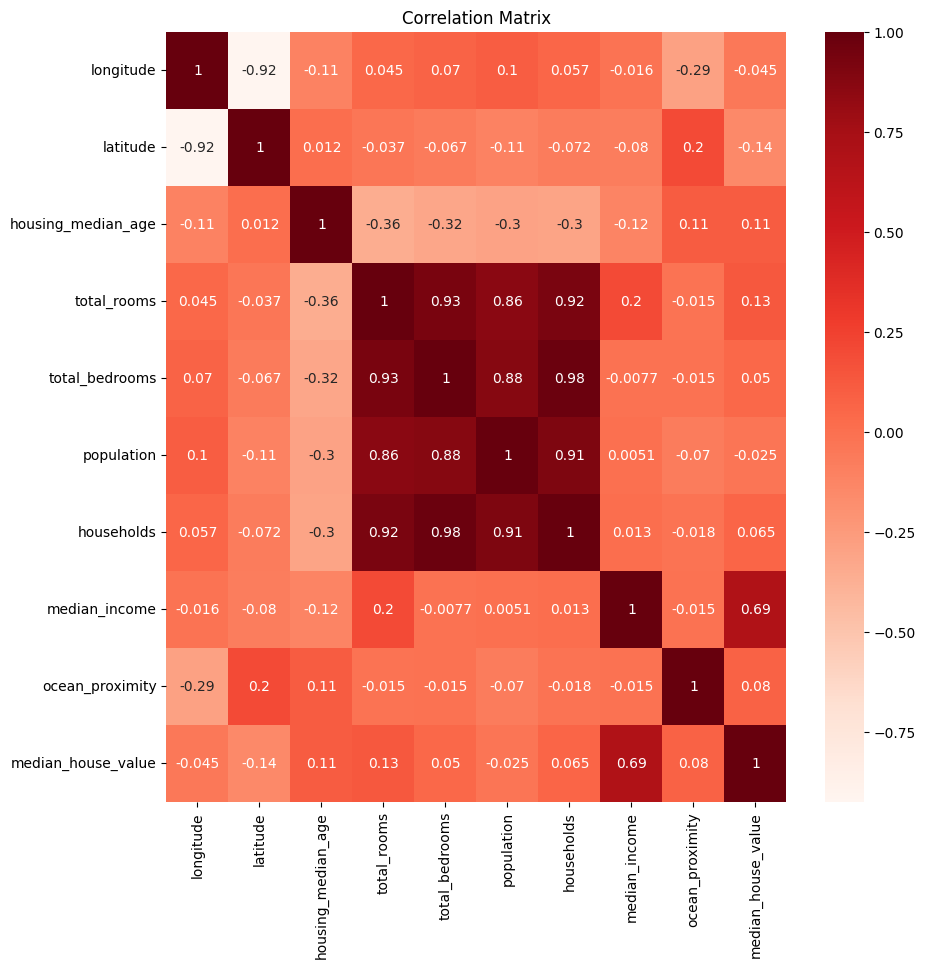

In [81]:
# CREATE FIGURE OF THE CORRELATION MATRIX
corr_matrix(df_hPrice)

In the Simple Linear Regression Model, only the most relevant feature with respect to the target is interesting. Thus, another way to view only the necessary information is to create a table with the features' correlation with the target.

In [51]:
# FEATURES CORRELATOIN WITH THE TARGET
corr_matrix = df_hPrice.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
total_rooms,0.133294
housing_median_age,0.106432
ocean_proximity,0.080488
households,0.064894
total_bedrooms,0.049686
population,-0.025300
longitude,-0.045398
latitude,-0.144638


Both ways show us that the **median_income** feature is the most related to **median_house_value**, which is the target. In this case, I will drop the rest of the columns because they were unnecessary when creating the model.

In [56]:
# DROP THE UNNECESSARY COLUMNS
df_lr_hPrice = df_hPrice[['median_income','median_house_value']]

# DISPLAY NEW DATASET
display(df_lr_hPrice)

,median_income,median_house_value
0,0.079337,0.804533
1,0.076054,0.416493
2,-0.067944,0.390101
3,-0.290603,0.345566
4,-0.538448,0.349277
...,...,...
20428,-0.853740,-0.739791
20429,-0.716294,-0.743914
20430,-0.834471,-0.681234
20431,-0.811409,-0.712574


From this point on, you will simply split the data for training and testing, then build the model, train the model, and test the model to identify its performance.

In [58]:
# IDENTIFY THE FEATURE AND THE LABEL
lr_x = df_lr_hPrice.drop('median_house_value', axis=1)
lr_y = df_lr_hPrice['median_house_value']

# SPLIT THE DATA INTO TRAIN AND TEST
lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(lr_x, lr_y, test_size=0.3, random_state=42)

In [59]:
# CREATE THE LINEAR REGRESSION MODEL
lr_model = LinearRegression(n_jobs=-1)

# TRAIN THE MODEL
lr_model.fit(lr_x_train, lr_y_train)

# TEST THE MODEL
lr_y_pred = lr_model.predict(lr_x_test)

In [60]:
# PRESENT THE SLOPE AND THE INTERCEPT
print('Slope: ', lr_model.coef_)
print('Intercept: ', lr_model.intercept_)

Slope:  [1.24642416]
Intercept:  0.45854067597201636


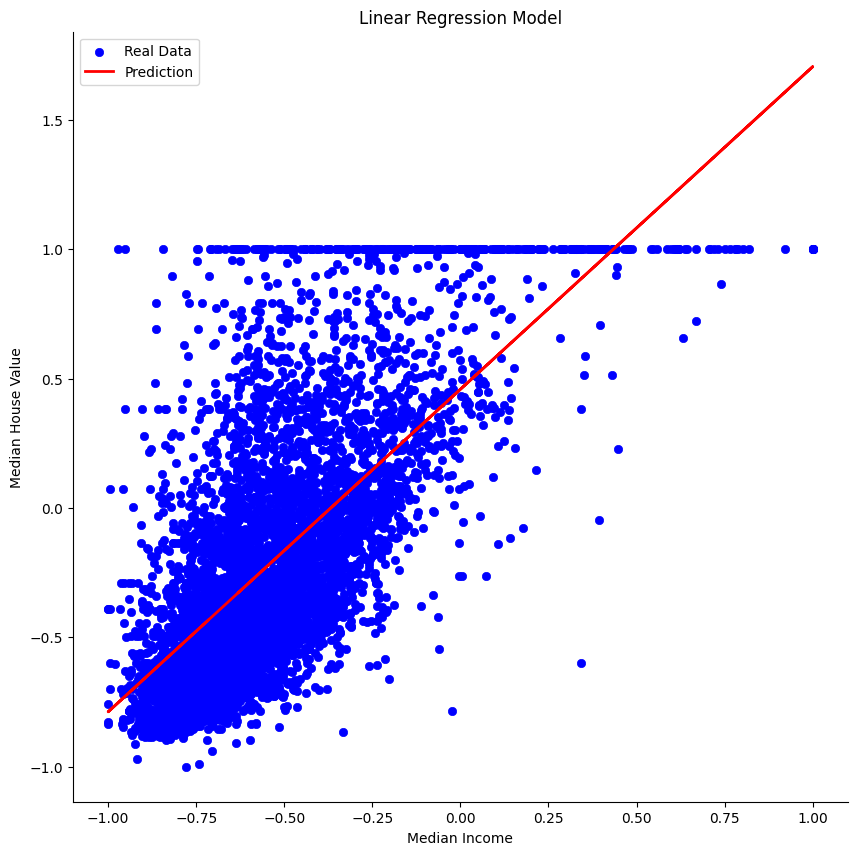

In [66]:
# CREATE FIGURE
plt.figure(figsize = (10,10))

# REAL DATA
plt.scatter(lr_x_test, lr_y_test, color = 'blue', linewidth = 0.5, label = 'Real Data')

# LINEAR REGRESSION PREDICTION
plt.plot(lr_x_test, lr_y_pred, color = 'red', linewidth = 2, label = 'Prediction')

# TAGS
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression Model')
plt.legend()

# DROP TOP AND LEFT BORDERS
sns.despine()

# SHOW FIGURE
plt.show()

In [69]:
# PRESENT THE MODEL METRICS
print('Mean Absolute Error (MAE): ', mean_absolute_error(lr_y_test, lr_y_pred))
print('Mean Squared Error (MSE): ', mean_squared_error(lr_y_test, lr_y_pred))
print('Root Mean Squared Error (RMSE): ', np.sqrt(mean_squared_error(lr_y_test, lr_y_pred)))
print('R2 Score: ', r2_score(lr_y_test, lr_y_pred))

Mean Absolute Error (MAE):  0.25820490073635005
Mean Squared Error (MSE):  0.11874252151774603
Root Mean Squared Error (RMSE):  0.3445903677088871
R2 Score:  0.4761911795039645


As can be seen in the graph, although the line is considerably well located, the data is very dispersed around the line.

Additionally, the <FONT COLOR="cyan">*Mean Absolute Error (MAE)*</FONT> is 0.26, which must be taken into account since the data range is between -1 and 1.

Regarding the <FONT COLOR="cyan">*Mean Square Error (MSE)*</FONT>, although its value is promising and the model is not causing catastrophic errors, a value of 0.11 indicates a wide margin for improvement considering the data scale of -1 to 1.

If we look at it from the point of view of the <FONT COLOR="cyan">*Root Mean Square Error (RMSE)*</FONT>, with a score of 0.34, it means that, on average, it is making an error of 34%, which is not optimal.

Finally, let's look at the <FONT COLOR="cyan">*$R^2$*</FONT> metric. We see that a score of 0.47 can only explain 47% of the variability in the data, which implies that it cannot adapt to more than half of the variations correctly.

## <FONT COLOR="orange">**Multiple Linear Regression Practice**</FONT>
---

To achieve a good level in the exercise, it is relevant to import the necessary libraries to implement a **Multilpe Linear Regression Model**; in this case, I use [Linear Regression Model of Sklearn library](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html) that allow the implementation of the multiple features to predict a label.

In [70]:
# IMPORT LIBRARIES
from sklearn.linear_model import LinearRegression

To achieve a good prediction with the **Multiple Linear Regression Model**, it is essential to select the correct features to realize the prediction since not all features are relevant for prediction.

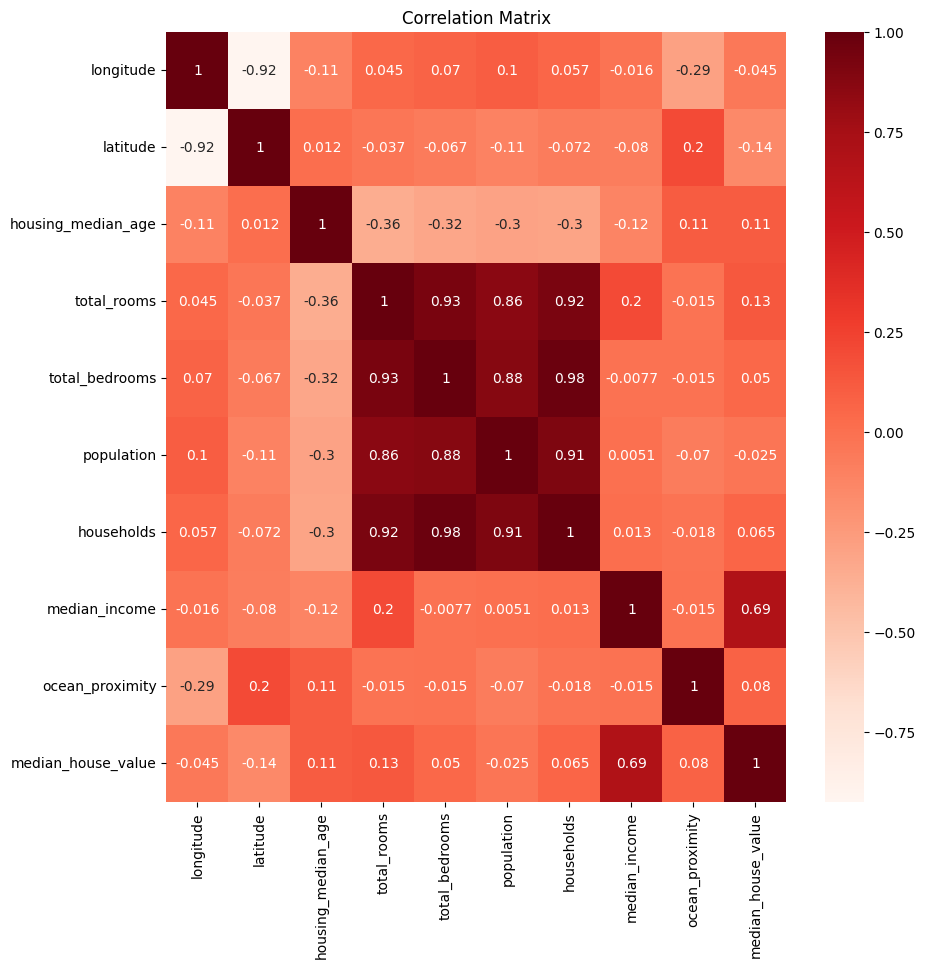

In [82]:
# CREATE THE FIGURE OF THE CORRELATION MATRIX
corr_matrix(df_hPrice)

Considering that there are characteristics strongly related to each other, it was decided to choose the one most closely associated with the objective. In this way, the following were selected:

*   latitud
*   housing_median_age
*   total_rooms
*   median_income



In [84]:
# CREATE A COPY OF THE DATASET
df_mlr_hPrice = df_hPrice[['latitude', 'housing_median_age', 'total_rooms', 'median_income', 'median_house_value']]

# DISPLAY NEW DATASET
display(df_mlr_hPrice)

,latitude,housing_median_age,total_rooms,median_income,median_house_value
0,0.134963,0.568627,-0.955339,0.079337,0.804533
1,0.130712,-0.215686,-0.638995,0.076054,0.416493
2,0.128587,1.000000,-0.925479,-0.067944,0.390101
3,0.128587,1.000000,-0.935297,-0.290603,0.345566
4,0.128587,1.000000,-0.917341,-0.538448,0.349277
...,...,...,...,...,...
20428,0.475027,-0.058824,-0.915408,-0.853740,-0.739791
20429,0.477152,-0.333333,-0.964647,-0.716294,-0.743914
20430,0.464400,-0.372549,-0.885447,-0.834471,-0.681234
20431,0.464400,-0.333333,-0.905489,-0.811409,-0.712574


From this point on, you will simply split the data for training and testing, then build the model, train the model, and test the model to identify its performance.

In [85]:
# IDENTIFY FEATURES AND LABEL
mlr_x = df_mlr_hPrice.drop('median_house_value', axis=1)
mlr_y = df_mlr_hPrice['median_house_value']

# SPLIT DATA INTO TRAIN AND TEST
mlr_x_train, mlr_x_test, mlr_y_train, mlr_y_test = train_test_split(mlr_x, mlr_y, test_size=0.3, random_state=42)

In [86]:
# CREATE THE MODEL
mlr_model = LinearRegression(n_jobs=-1)

# TRAIN THE MODEL
mlr_model.fit(mlr_x_train, mlr_y_train)

# TEST THE MODEL
mlr_y_pred = mlr_model.predict(mlr_x_test)

In [87]:
# PRESENT THE COEFFICIENTS AND INTERCEPT
print('Coefficient: ', mlr_model.coef_)
print('Intercept: ', mlr_model.intercept_)

Coefficient:  [-0.09805223  0.20831506  0.30676433  1.25573588]
Intercept:  0.678686144133533


In [118]:
def mlr_figure(min:float, max:float, x_real:pd.DataFrame, y_real:pd.Series, y_pred:np.ndarray)->None:
  # CREATE FIGURE
  plt.figure(figsize = (7,7))

  # CREATE X-AXIS
  axisPlot=range(mlr_x_test.shape[0])

  # REAL DATA
  plt.scatter(list(axisPlot), mlr_y_test, color="blue", linewidth=0.5, label='Real Data')

  # MULTIPLE LINEAR REGRESSION
  plt.plot(list(axisPlot), mlr_y_pred, color="red", linewidth=1, label='Prediction')

  # DELIMIT X-AXIS
  plt.xlim(min, max)

  # TAGS
  plt.xlabel('Data Point')
  plt.ylabel('Median House Value')
  plt.title('Multiple Linear Regression')
  plt.legend()

  # GRID
  plt.minorticks_on()
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

  # DROP TOP AND LEFT BORDERS
  sns.despine()

  # SHOW FIGURE
  plt.show()

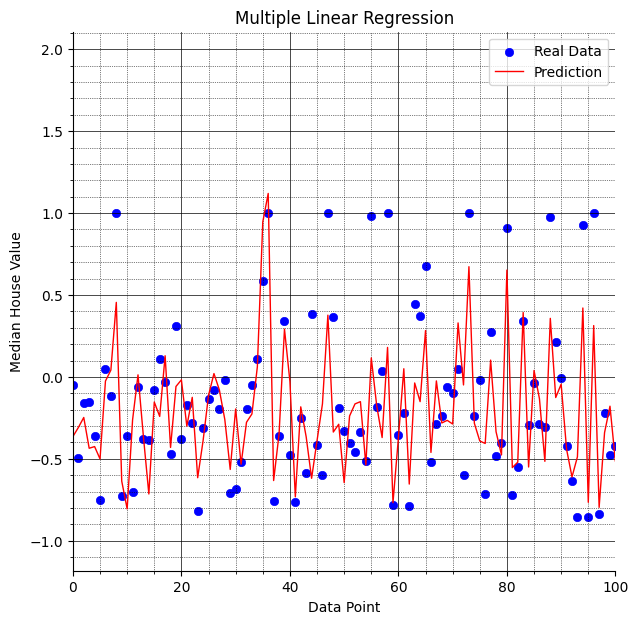

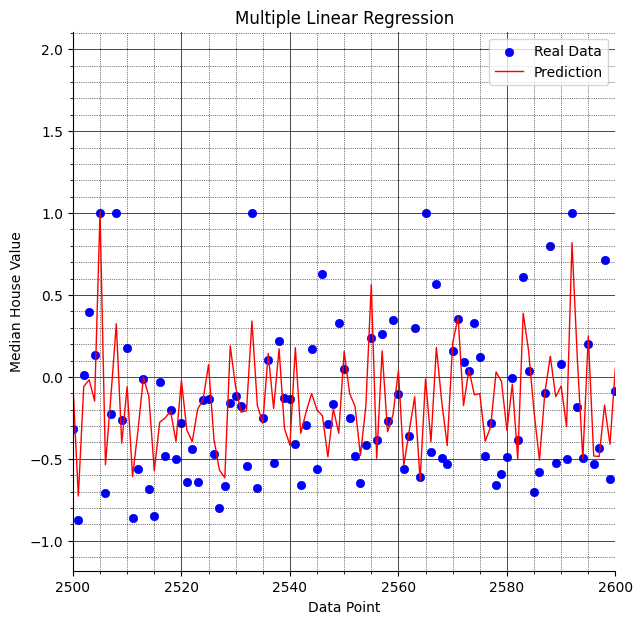

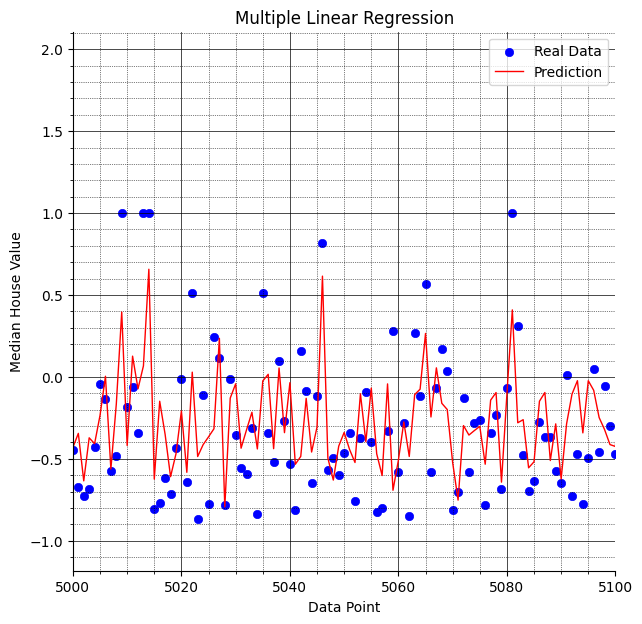

In [122]:
# CREATE MULTIPLE LINEAR REGRESSION FIGURE BETWEEN 0 AND 100
mlr_figure(0, 100, mlr_x_test, mlr_y_test, mlr_y_pred)

# CREATE MULTIPLE LINEAR REGRESSION FIGURE BETWEEN 2500 AND 2600
mlr_figure(2500, 2600, mlr_x_test, mlr_y_test, mlr_y_pred)

# CREATE MULTIPLE LINEAR REGRESSION FIGURE BETWEEN 5000 AND 5100
mlr_figure(5000, 5100, mlr_x_test, mlr_y_test, mlr_y_pred)

In [112]:
# CALCULATE METRICS
print('Mean Absolute Error (MAE): ', mean_absolute_error(mlr_y_test, mlr_y_pred))
print('Mean Squared Error (MSE): ', mean_squared_error(mlr_y_test, mlr_y_pred))
print('Root Mean Squared Error (RMSE): ', np.sqrt(mean_squared_error(mlr_y_test, mlr_y_pred)))
print('R2 Score: ', r2_score(mlr_y_test, mlr_y_pred))

Mean Absolute Error (MAE):  0.24754847488551845
Mean Squared Error (MSE):  0.108626683615351
Root Mean Squared Error (RMSE):  0.32958562410298026
R2 Score:  0.5208151697330311


As can be seen in the three graphical representations of the data, the data are still dispersed around the prediction; the above is supported by the metrics because although they go down <FONT COLOR="cyan">*(MAE, MSE, RMSE)*</FONT> and up <FONT COLOR="cyan">*$R^2$*</FONT>, in short, they improve only a little. The model's performance is not optimal, <FONT COLOR="lightgreen">so trying another type of algorithm is suggested</FONT>.